In [1]:
%reset -f
import math
import numpy as np
import copy
import cv2
import matplotlib.pyplot as plt
import skimage as sk
import scipy.signal

from PIL import Image
from scipy import ndimage
from scipy import signal
from scipy.interpolate import interp1d
from skimage import io, morphology, filters
import cv2
import functions_IMA as functions


(1536, 2048, 3)


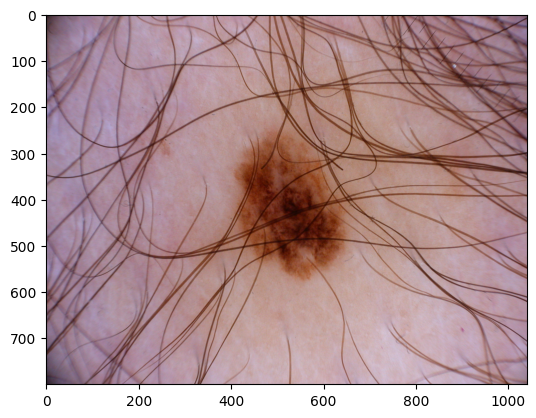

In [2]:
#Importing image
image = io.imread('ISIC_0000095.jpg')
print(image.shape)
image_resized = cv2.resize(image,(1040,800))
plt.imshow(image_resized)

In [3]:
seuil_binarisation = 240
max_length_hair = 12
nombres_directions_peau = 6
taille_max_poil_autre = 7

Parameters_hair_verification = [max_length_hair, nombres_directions_peau, taille_max_poil_autre]

#taille 12 width 1
S0 = functions.create_matrices_horizontal(12, 2)
S45 = functions.create_matrices_diago(12, 2)
S30 = functions.create_matrix_angle(12, 30)
S90 = np.transpose(S0)
elements_structurants = [S45, S30, S0]

Binary_mask, Binary_mask_verified, distances = functions.hair_detection(image_resized, elements_structurants, seuil_binarisation, Parameters_hair_verification)


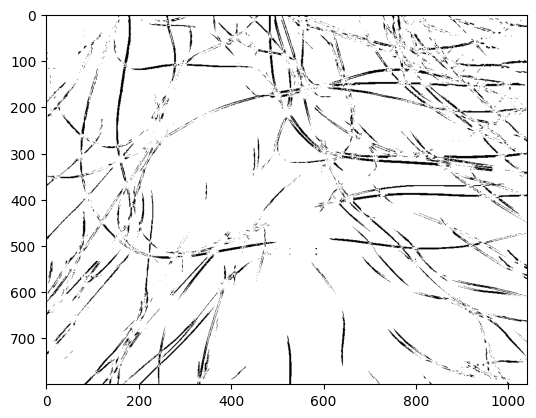

In [4]:
plt.imshow(Binary_mask_verified, cmap='gray')

KeyboardInterrupt: 

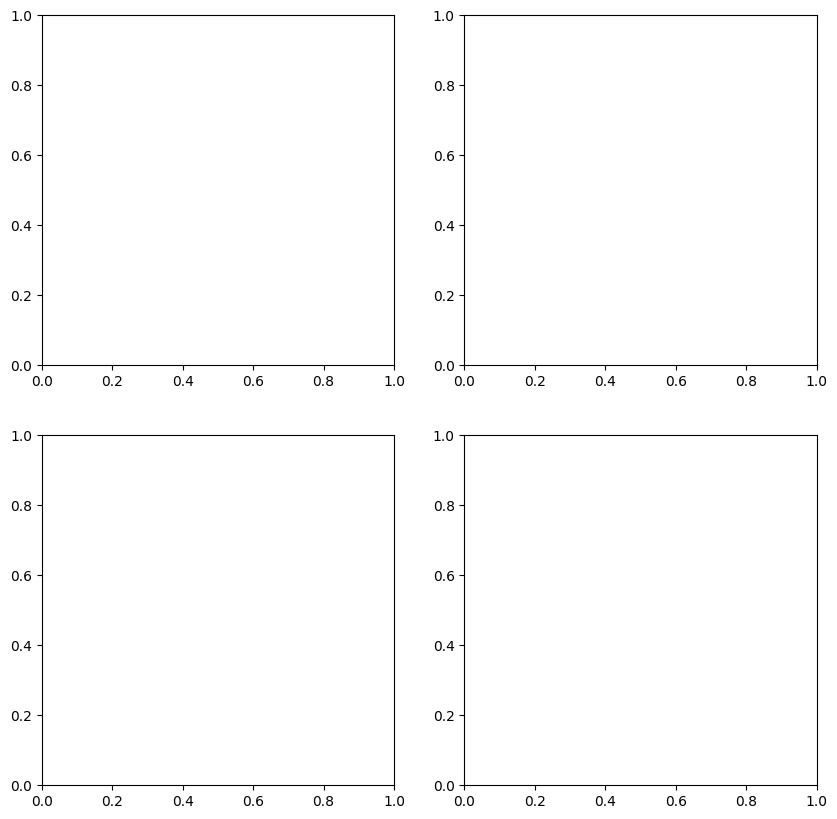

In [19]:
### Modification seuil binarisation
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
S0 = functions.create_matrices_horizontal(11, 3)
S20 = functions.create_matrix_angle(11, 20)
S30 = functions.create_matrix_angle(11, 30)
S45 = functions.create_matrices_diago(11, 3)
S_minus20 = functions.create_matrix_angle(11, -20)

elements_structurants = [S45, S0, S20, S30, S_minus20]
max_length_hair = 10
nombres_directions_peau = 6
taille_max_poil_autre = 8
Parameters_hair_verification = [max_length_hair, nombres_directions_peau, taille_max_poil_autre]


binary_mask_seuil_200 = functions.hair_detection(image_resized, elements_structurants, 200, Parameters_hair_verification)[1]
binary_mask_seuil_210 = functions.hair_detection(image_resized, elements_structurants, 210, Parameters_hair_verification)[1]
binary_mask_seuil_220 = functions.hair_detection(image_resized, elements_structurants, 220, Parameters_hair_verification)[1]
binary_mask_seuil_230 = functions.hair_detection(image_resized, elements_structurants, 230, Parameters_hair_verification)[1]


ax[0, 0].imshow(binary_mask_seuil_200,cmap='gray')
ax[0, 1].imshow(binary_mask_seuil_210, cmap='gray')
ax[1, 0].imshow(binary_mask_seuil_220, cmap='gray')
ax[1, 1].imshow(binary_mask_seuil_230, cmap='gray')

# Show the plot
plt.show()

In [ ]:
### Modification element structurant



Il y a trop de bruit pour un seuil de binarisation à 250, on va prendre un seuil à 240

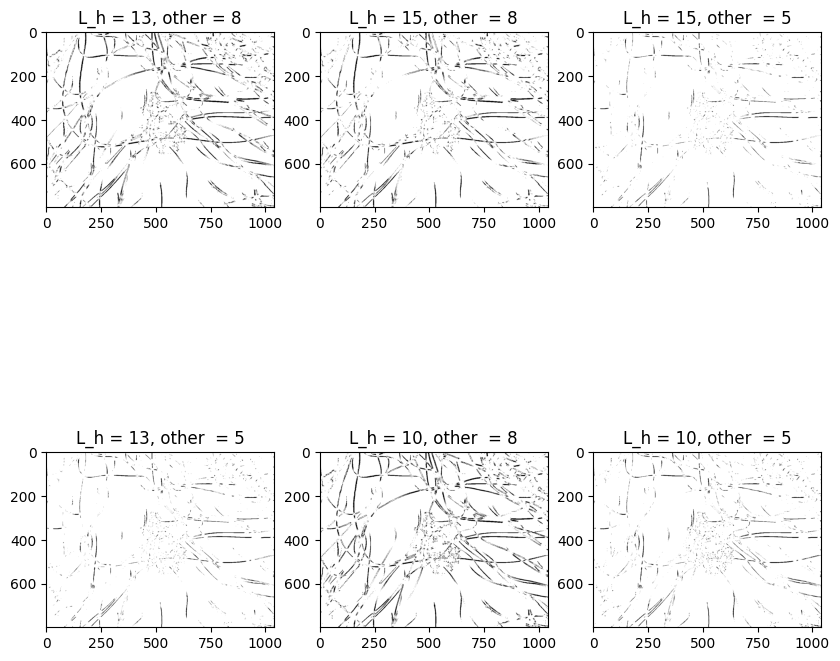

In [99]:
### Modification max_length_hair 
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

BM_maxlength_13_8 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, Parameters_hair_verification)[1]
BM_maxlength_15_8 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, [15, nombres_directions_peau, taille_max_poil_autre])[1]
BM_maxlength_15_5 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, [15, nombres_directions_peau, 5])[1]
BM_maxlength_13_5 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, [13, nombres_directions_peau, 5])[1]
BM_maxlength_10_8 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, [10, nombres_directions_peau, taille_max_poil_autre])[1]
BM_maxlength_10_5 = functions.hair_detection(image_resized, elements_structurants_30_2, seuil_binarisation, [10, nombres_directions_peau, 5])[1]

ax[0, 0].imshow(BM_maxlength_13_8,cmap='gray')
ax[0, 0].set_title('L_h = 13, other = 8')
ax[0, 1].imshow(BM_maxlength_15_8, cmap='gray')
ax[0, 1].set_title('L_h = 15, other  = 8')
ax[0, 2].imshow(BM_maxlength_15_5, cmap='gray')
ax[0, 2].set_title('L_h = 15, other  = 5')
ax[1, 0].imshow(BM_maxlength_13_5, cmap='gray')
ax[1, 0].set_title('L_h = 13, other  = 5')
ax[1, 1].imshow(BM_maxlength_10_8, cmap='gray')
ax[1, 1].set_title('L_h = 10, other  = 8')
ax[1, 2].imshow(BM_maxlength_10_5, cmap='gray')
ax[1, 2].set_title('L_h = 10, other  = 5')


plt.show()

On va garder 10 pour la longueur du cheveu maximal et 8 la taille maximale pour les autres

(800, 1040, 3)
image shape (800, 1040, 3)
binary mask shape (800, 1040)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

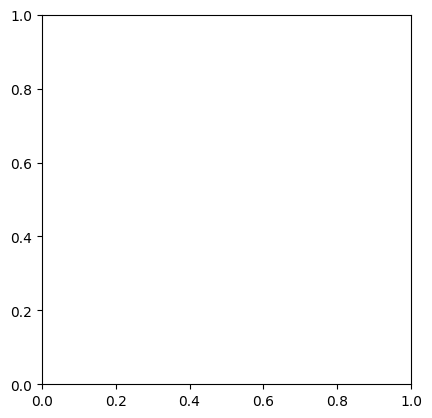

In [4]:
print(image_resized.shape)
new_image = functions.hair_replacement(image_resized, Binary_mask_verified, distances)


In [5]:
new_image.shape()

AttributeError: 'tuple' object has no attribute 'shape'